In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install ipywidgets

In [2]:
# Import necessary libraries
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import io
import ipywidgets as widgets


2024-05-08 17:33:40.415407: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Introduction
This lab is designed to introduce you to the basics of deep learning by interacting with a pre-built model. You'll understand the workflow of a deep learning project, including data preprocessing, model architecture, and making predictions. The goal is to familiarize yourself with the basics of deep learning without writing any code.


In [3]:
# Load the VGG16 model
model = VGG16(weights='imagenet')

# Display the model architecture
model.summary()


2024-05-08 17:33:48.528762: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

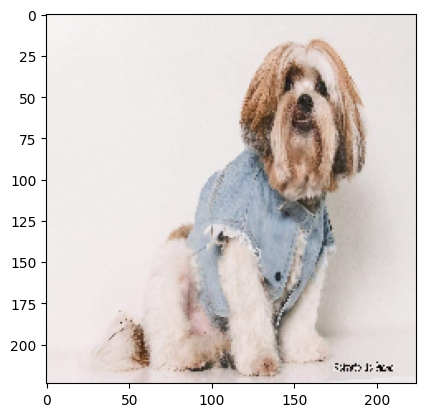

In [16]:
# Load and preprocess an image
def load_and_preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Expand dimensions to fit the model input
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image
    img_array = preprocess_input(img_array)

    return img, img_array

# Load and preprocess a sample image
sample_image, processed_image = load_and_preprocess_image("Ziggy_jeans.jpeg")

# Display the sample image
plt.imshow(sample_image)
plt.show()


## Step 4: Making Predictions

In this step, you will learn how to use a pre-trained VGG16 model to make predictions on new data — specifically, images that you upload. This process involves several stages, including uploading your image, preprocessing it to meet the model's input requirements, and finally, using the model to predict what the image represents.

### 4.1. Uploading an Image

To make predictions, the model first needs an input image. This is where the interactive widget comes into play:

- **Upload Button**: You will see an upload button labeled 'Upload Image'. Clicking this button will open your file explorer.
- **Selecting Image**: Navigate through your files and select the image you want to analyze. The accepted formats usually include JPEG, PNG, and others, depending on the configuration.
- **Uploading**: After selecting the image, it will be uploaded and stored in a temporary location in this notebook's environment for processing.

### 4.2. Image Preprocessing

The uploaded image needs to be preprocessed to ensure compatibility with the VGG16 model. This preprocessing involves several steps:

1. **Reading the Image**: The uploaded image is read into the notebook as a data stream and then converted into a format that the model can process (typically, a numerical array).
2. **Resizing**: VGG16 requires input images to be of a specific size (224x224 pixels). If your uploaded image is of a different size, it will be resized.
3. **Color Channels Adjustment**: The model expects images to have three color channels (Red, Green, Blue). If the uploaded image has a different format (like grayscale), it will be adjusted accordingly.
4. **Array Conversion and Dimension Expansion**: The image is then converted into a multi-dimensional array (a format that the neural network can process), and dimensions are added or expanded to match the input shape that the model expects.
5. **Normalization**: Finally, pixel values are normalized or scaled to a range that the model is trained on, usually [0, 1] or [-1, 1], depending on the specific preprocessing requirements of the VGG16 model.

After these preprocessing steps, your image is ready to be fed into the model for prediction.

In the next section, you'll learn how the model uses this preprocessed image to predict the content of the image.


In [17]:
# Make predictions
predictions = model.predict(processed_image)

# Decode and print the predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]
print(decoded_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
[('n02097474', 'Tibetan_terrier', 0.34107056), ('n02091635', 'otterhound', 0.18327066), ('n02102318', 'cocker_spaniel', 0.1416056)]


## Step 5: Understanding Predictions

After making predictions in the previous step, you now have a chance to dive deeper into the model's behavior. In this step, you will explore how slight modifications to the input image (like rotation, adding noise, or changing brightness) can affect the model's predictions. This process helps in understanding the robustness and sensitivity of the neural network.

### 5.1. Observing Model Predictions

Initially, you will observe the predictions made by the model on the uploaded image. The model provides a set of predictions, each with a corresponding probability score indicating the model's confidence in its prediction. For example:

- **Prediction 1**: 'Labrador Retriever' with a confidence of 94.5%
- **Prediction 2**: 'Golden Retriever' with a confidence of 5.0%
- **Prediction 3**: 'Beagle' with a confidence of 0.5%

These predictions give you a glimpse into what the model 'sees' in the image.

### 5.2. Experimenting with Image Modifications

Understanding a model's predictions goes beyond just seeing what it predicts; it's also about understanding how certain changes to the input can alter these predictions. This section involves interacting with different image modifications:

1. **Rotation**: Rotate the image by a certain degree. Observe how rotating the image affects the predictions. Does the model still recognize the object correctly?
2. **Adding Noise**: Introduce random visual noise to the image. This can help you understand how noise-tolerant the model is.
3. **Brightness Adjustment**: Change the brightness of the image. This helps in understanding if the model's predictions are sensitive to changes in lighting conditions.

For each modification, you will:

- Apply the modification to the uploaded image.
- Use the model to make new predictions on the modified image.
- Observe how the predictions change in response to the modifications.

### 5.3. Reflection and Analysis

After observing how the model's predictions change with different image modifications, reflect on the following questions:

- How robust is the model to changes in the input image?
- Which types of modifications affect the model's predictions the most?
- What does this tell you about the features that the model is focusing on when making predictions?

This step is crucial in understanding not just what a model sees, but also how stable and reliable its 'vision' is under various conditions. It encourages a deeper understanding of the model's capabilities and limitations.


In [19]:
# Upload button to load images
upload = widgets.FileUpload()
display(upload)

# Button to make predictions
predict_button = widgets.Button(description="Make Prediction")
display(predict_button)

# Function to handle button click
def on_click(change):
    img_data = list(upload.value.values())[0]['content']
    img = Image.open(io.BytesIO(img_data))
    img = img.resize((224, 224))
    
    # Preprocess and predict
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    
    # Display predictions
    print(decoded_predictions)

predict_button.on_click(on_click)


FileUpload(value={}, description='Upload')

Button(description='Make Prediction', style=ButtonStyle())

# Conclusion and Discussion
Reflect on the lab activities. Discuss how the pre-trained model was able to make predictions, the role of data preprocessing, and the impact of input modifications on the model's predictions.
